In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from spicy import stats

In [2]:
# loading data and info
df = pd.read_csv('../data/ab_test_users.csv')
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        50000 non-null  int64 
 1   group          50000 non-null  object
 2   day7_returned  50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


user_id          0
group            0
day7_returned    0
dtype: int64

In [3]:
# retention

retention = df.groupby('group')['day7_returned'].mean().round(4) * 100 # in %
print(f'Group A retention: {retention['A']:.2f}%')
print(f'Group B retention: {retention['B']:.2f}%')

#uplift

print(f'Absolute uplift: {retention['B'] - retention['A']:.2f}')
print(f"Relative uplift: {(retention['B']/retention['A']-1)*100:.2f}%")

Group A retention: 30.13%
Group B retention: 29.53%
Absolute uplift: -0.60
Relative uplift: -1.99%


In [8]:
# z-test
a_users = df[df['group'] == 'A']
b_users = df[df['group'] == 'B']

num_a, num_b = len(a_users), len(b_users)
returned_a, returned_b = a_users['day7_returned'].sum(), b_users['day7_returned'].sum()

def ztest(p1, p2, n1, n2):
    p = (returned_a + returned_b) / (num_a + num_b)
    se = np.sqrt((p * (1 - p)) * (1/n1 + 1/n2))
    z = (p1 - p2) / se
    p_value = 2 * (1 - stats.norm.cdf(z))
    return z, p_value

z_stat, p_value = ztest(retention['A']/100, retention['B']/100, num_a, num_b)

print(f"Z statistic: {z_stat}")
print(f"p value: {p_value}")

Z statistic: 1.4662335637160784
p value: 0.1425846677198095


In [8]:
# z-test
a_users = df[df['group'] == 'A']
b_users = df[df['group'] == 'B']

num_a, num_b = len(a_users), len(b_users)
returned_a, returned_b = a_users['day7_returned'].sum(), b_users['day7_returned'].sum()

def ztest(p1, p2, n1, n2):
    p = (returned_a + returned_b) / (num_a + num_b)
    se = np.sqrt((p * (1 - p)) * (1/n1 + 1/n2))
    z = (p1 - p2) / se
    p_value = 2 * (1 - stats.norm.cdf(z))
    return z, p_value

z_stat, p_value = ztest(retention['A']/100, retention['B']/100, num_a, num_b)

print(f"Z statistic: {z_stat}")
print(f"p value: {p_value}")

Z statistic: 1.4662335637160784
p value: 0.1425846677198095


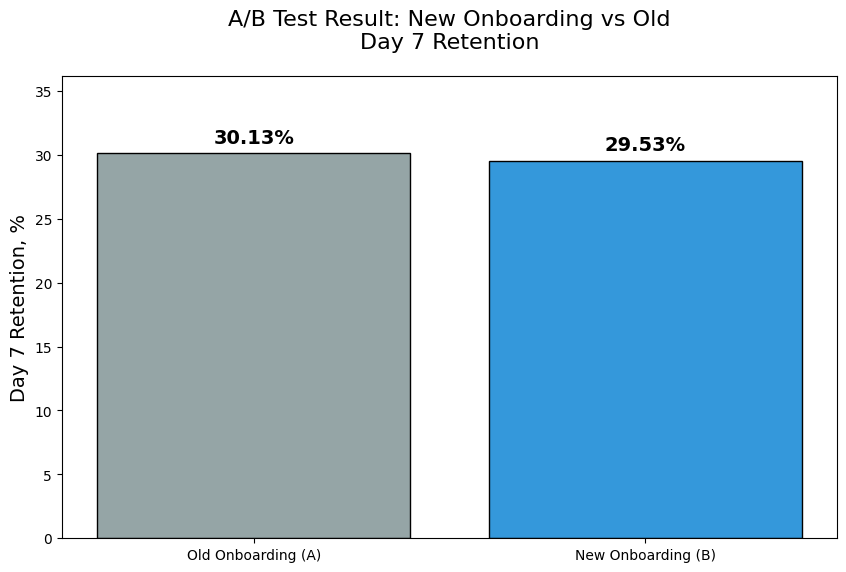

In [6]:
# visual

plt.figure(figsize=(10,6))
bars = plt.bar(['Old Onboarding (A)', 'New Onboarding (B)'], 
               [retention['A'], retention['B']], 
               color=['#95a5a6', '#3498db'], edgecolor='black')

plt.ylabel('Day 7 Retention, %', fontsize=14)
plt.title('A/B Test Result: New Onboarding vs Old\nDay 7 Retention', fontsize=16, pad=20)

# Подписываем значения на столбцах
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.ylim(0, max(retention)*1.2)
plt.show()